![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de modelos Bagging, Random Forest y XGBoost

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de modelos de Bagging, Random Forest y XGBoost. El taller está constituido por 8 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción precio de automóviles

En este taller se usará el conjunto de datos de Car Listings de Kaggle donde cada observación representa el precio de un automóvil teniendo en cuenta distintas variables como año, marca, modelo, entre otras. El objetivo es predecir el precio del automóvil. Para más detalles puede visitar el siguiente enlace: [datos](https://www.kaggle.com/jpayne/852k-used-car-listings).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
%matplotlib inline
import pandas as pd

# Lectura de la información de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTrain_carListings.zip')

# Preprocesamiento de datos para el taller
data = data.loc[data['Model'].str.contains('Camry')].drop(['Make', 'State'], axis=1)
data = data.join(pd.get_dummies(data['Model'], prefix='M'))
data = data.drop(['Model'], axis=1)

# Visualización dataset
data.head()

,Price,Year,Mileage,M_Camry,M_Camry4dr,M_CamryBase,M_CamryL,M_CamryLE,M_CamrySE,M_CamryXLE
7,21995,2014,6480,False,False,False,True,False,False,False
11,13995,2014,39972,False,False,False,False,True,False,False
167,17941,2016,18989,False,False,False,False,False,True,False
225,12493,2014,51330,False,False,False,True,False,False,False
270,7994,2007,116065,False,True,False,False,False,False,False


In [3]:
# Separación de variables predictoras (X) y variable de interés (y)
y = data['Price']
X = data.drop(['Price'], axis=1)

In [4]:
# Separación de datos en set de entrenamiento y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 1 - Árbol de decisión manual

En la celda 1 creen un árbol de decisión **manualmente**  que considere los set de entrenamiento y test definidos anteriormente y presenten el RMSE y MAE del modelo en el set de test.

In [5]:
# Celda 1


### Punto 2 - Bagging manual

En la celda 2 creen un modelo bagging **manualmente** con 10 árboles de regresión y comenten sobre el desempeño del modelo.

In [6]:
# Celda 2


### Punto 3 - Bagging con librería

En la celda 3, con la librería sklearn, entrenen un modelo bagging con 10 árboles de regresión y el parámetro `max_features` igual a `log(n_features)` y comenten sobre el desempeño del modelo.

In [7]:
# Celda 3


### Punto 4 - Random forest con librería

En la celda 4, usando la librería sklearn entrenen un modelo de Randon Forest para regresión  y comenten sobre el desempeño del modelo.

In [8]:
# Celda 4


### Punto 5 - Calibración de parámetros Random forest

En la celda 5, calibren los parámetros max_depth, max_features y n_estimators del modelo de Randon Forest para regresión, comenten sobre el desempeño del modelo y describan cómo cada parámetro afecta el desempeño del modelo.

In [9]:
# Celda 5


### Punto 6 - XGBoost con librería

En la celda 6 implementen un modelo XGBoost de regresión con la librería sklearn y comenten sobre el desempeño del modelo.

In [10]:
# Celda 6
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
import math

xbg_m = XGBRegressor()

scr_rmse = math.sqrt(-1*(cross_val_score(xbg_m,X,y,cv=5,scoring='neg_mean_squared_error').mean()))
scr_mae = -1 * (cross_val_score(xbg_m,X,y,cv=5,scoring='neg_mean_absolute_error').mean())

### Respuesta: Resultados XGboost e interpretación
Se observa que el RMSE (Raíz del Error Cuadrático Medio) es de 1583.20, y el MAE (Error Absoluto Medio) es de 1167.22.

Lo anterior implica que el modelo XGboost que se generó en la celda anterior, se desvía arroneamente en 1583.20 unidades con respecto al precio real. Asimismo, de acuerdo con el MAE, el modelo también se estaría desviando en 1167.22 unidades (precio) con respecto a los valores reales.

### Punto 7 - Calibración de parámetros XGBoost

En la celda 7 calibren los parámetros learning rate, gamma y colsample_bytree del modelo XGBoost para regresión, comenten sobre el desempeño del modelo y describan cómo cada parámetro afecta el desempeño del modelo.

In [36]:
# Celda 7
import numpy as np
import matplotlib.pyplot as plt

scr_rmse_cal = []
scr_mae_cal = []

lr = np.arange(0.01, 0.2, 0.01)

for i in lr:
    xbg_cal = XGBRegressor(learning_rate = i, ramdom_state = 0)
    xgb_cal_rmse = math.sqrt(-1*(cross_val_score(xbg_cal,X,y,cv=5,scoring='neg_mean_squared_error').mean()))
    xgb_cal_mae = -1*(cross_val_score(xbg_cal,X,y,cv=5,scoring='neg_mean_absolute_error').mean())
    scr_rmse_cal.append(xgb_cal_rmse)
    scr_mae_cal.append(xgb_cal_mae)

Text(0, 0.5, 'scr_rmse_cal')

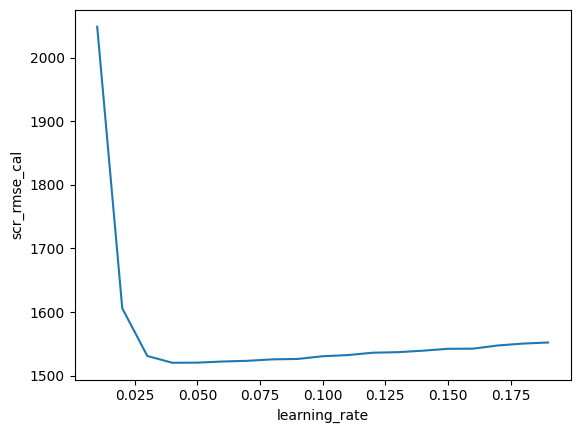

In [12]:
plt.plot(lr, scr_rmse_cal)
plt.xlabel('learning_rate')
plt.ylabel('scr_rmse_cal')

Text(0, 0.5, 'scr_mae_cal')

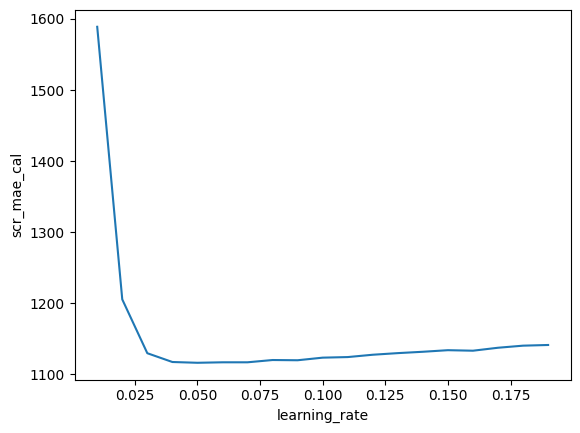

In [13]:
plt.plot(lr, scr_mae_cal)
plt.xlabel('learning_rate')
plt.ylabel('scr_mae_cal')

In [14]:
print("Tanto el RMSE como el MAE parecen sugerir el error se minimiza al rededor del intervalo 0.03 - 0.05. Es por esta razón que para el \
learning rate se utilizará un valor de 0.04.")

Tanto el RMSE como el MAE parecen sugerir el error se minimiza al rededor del intervalo 0.03 - 0.05. Es por esta razón que para el learning rate se utilizará un valor de 0.04.


In [23]:
scr_rmse_cal = []
scr_mae_cal = []

gamma_cal = np.arange(0.01, 1, 0.1)
gamma_cr = np.round(gamma_cal, 2)
gamma_cr = range(0, 5)

for i in gamma_cr:
    xbg_cal = XGBRegressor(learning_rate = 0.04, gamma=i, ramdom_state = 0)
    xgb_cal_rmse = math.sqrt(-1*(cross_val_score(xbg_cal,X,y,cv=5,scoring='neg_mean_squared_error').mean()))
    xgb_cal_mae = -1*(cross_val_score(xbg_cal,X,y,cv=5,scoring='neg_mean_absolute_error').mean())
    scr_rmse_cal.append(xgb_cal_rmse)
    scr_mae_cal.append(xgb_cal_mae)

Text(0, 0.5, 'scr_rmse_cal')

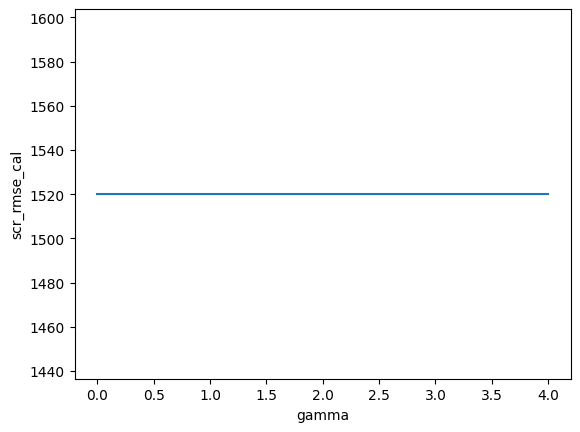

In [24]:
plt.plot(gamma_cr, scr_rmse_cal)
plt.xlabel('gamma')
plt.ylabel('scr_rmse_cal')

Text(0, 0.5, 'scr_mae_cal')

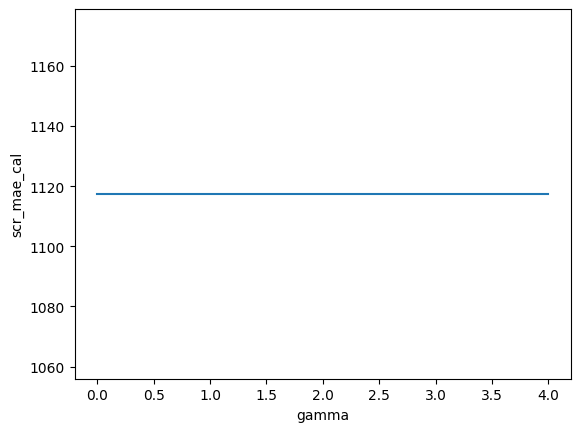

In [25]:
plt.plot(gamma_cr, scr_mae_cal)
plt.xlabel('gamma')
plt.ylabel('scr_mae_cal')

In [18]:
xbg_cal = XGBRegressor(learning_rate = 0.04, ramdom_state = 0)
xgb_cal_rmse = math.sqrt(-1*(cross_val_score(xbg_cal,X,y,cv=5,scoring='neg_mean_squared_error').mean()))
xgb_cal_mae = math.sqrt(-1*(cross_val_score(xbg_cal,X,y,cv=5,scoring='neg_mean_absolute_error').mean()))

In [26]:
print("Tanto el RMSE como el MAE parecen sugerir al variar el parámetro gamma no se observa una variación en el error. Es por esta razón que para el \
parámetro gamma no se utilizará ningún valor.")

Tanto el RMSE como el MAE parecen sugerir al variar el parámetro gamma no se observa una variación en el error. Es por esta razón que para el parámetro gamma no se utilizará ningún valor.


In [30]:
scr_rmse_cal = []
scr_mae_cal = []

colsample_bytree_cal = np.arange(0.1, 1.1, 0.1)

for i in colsample_bytree_cal:
    xbg_cal = XGBRegressor(learning_rate = 0.04, colsample_bytree=i, ramdom_state = 0)
    xgb_cal_rmse = math.sqrt(-1*(cross_val_score(xbg_cal,X,y,cv=5,scoring='neg_mean_squared_error').mean()))
    xgb_cal_mae = -1*(cross_val_score(xbg_cal,X,y,cv=5,scoring='neg_mean_absolute_error').mean())
    scr_rmse_cal.append(xgb_cal_rmse)
    scr_mae_cal.append(xgb_cal_mae)

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


Text(0, 0.5, 'scr_rmse_cal')

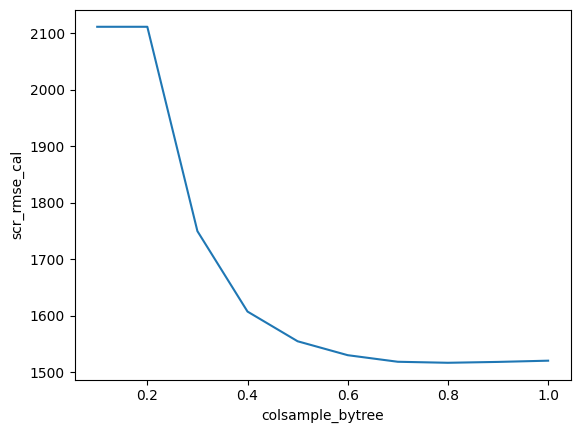

In [33]:
plt.plot(colsample_bytree_cal, scr_rmse_cal)
plt.xlabel('colsample_bytree')
plt.ylabel('scr_rmse_cal')

Text(0, 0.5, 'scr_mae_cal')

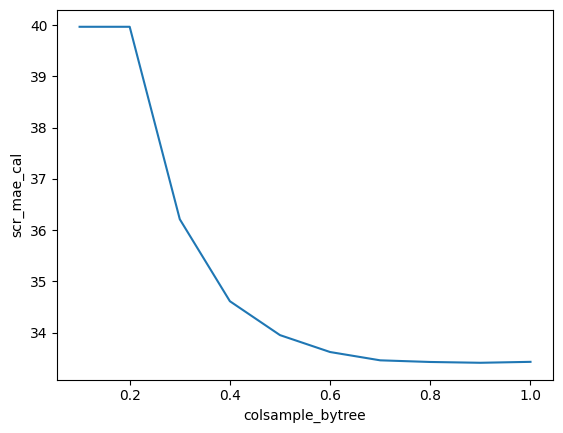

In [35]:
plt.plot(colsample_bytree_cal, scr_mae_cal)
plt.xlabel('colsample_bytree')
plt.ylabel('scr_mae_cal')

### Punto 8 - Comparación y análisis de resultados
En la celda 8 comparen los resultados obtenidos de los diferentes modelos (random forest y XGBoost) y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

In [22]:
# Celda 8
